In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [2]:
url=requests.get('https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav')
url

<Response [403]>

In [3]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTM, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
url=requests.get('https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav', headers=headers).text

In [4]:
soup=BeautifulSoup(url, 'html.parser')

In [5]:
soup.find_all('h1')

[<h1 class="bold-title-l title">List of companies in India</h1>]

In [6]:
company_name=soup.find_all('h2')


# Companies on the first page of the website

In [7]:
paras=soup.find_all('p')

In [8]:
for i in soup.find_all('h2'):
    print(i.text.strip())
    
# total companies on the first page 

TCS
Accenture
Cognizant
ICICI Bank
HDFC Bank
Wipro
Infosys
Capgemini
Tech Mahindra
Genpact
HCLTech
Amazon
Axis Bank
IBM
Concentrix Corpo...
Reliance jio
Larsen & Toubro ...
HDB Financial Se...
Vodafone Idea
Teleperformance
Reliance Retail
Kotak Mahindra B...
Deloitte
Reliance Industr...
Bharti Airtel
Tata Motors
BYJU'S
Flipkart
WNS
Mahindra & Mahin...


In [9]:
company=soup.find_all('div', class_='company-info-wrapper')
len(company)

#Length of companies on the first page

30

In [10]:
#extracting first page of the website 

name=[]
rating=[]
review=[]
ctype=[]
location=[]
old=[]
employees=[]

for i in company:
    name.append(i.find('h2', class_='company-name').text.strip())
    rating.append(i.find('p', class_='rating').text.strip())
    review.append(i.find('a', class_='review-count').text.strip())
    ctype.append(i.find_all('p', class_='infoEntity')[0].text.strip())
    location.append(i.find_all('p', class_='infoEntity')[1].text.strip())
    old.append(i.find_all('p', class_='infoEntity')[2].text.strip())
    employees.append(i.find_all('p', class_='infoEntity')[3].text.strip())

In [11]:
name

['TCS',
 'Accenture',
 'Cognizant',
 'ICICI Bank',
 'HDFC Bank',
 'Wipro',
 'Infosys',
 'Capgemini',
 'Tech Mahindra',
 'Genpact',
 'HCLTech',
 'Amazon',
 'Axis Bank',
 'IBM',
 'Concentrix Corpo...',
 'Reliance jio',
 'Larsen & Toubro ...',
 'HDB Financial Se...',
 'Vodafone Idea',
 'Teleperformance',
 'Reliance Retail',
 'Kotak Mahindra B...',
 'Deloitte',
 'Reliance Industr...',
 'Bharti Airtel',
 'Tata Motors',
 "BYJU'S",
 'Flipkart',
 'WNS',
 'Mahindra & Mahin...']

In [12]:
ctype

['Public',
 'Public',
 'Private',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Private',
 'Public',
 'Private',
 'Private',
 'Public',
 'Private',
 'Public',
 'Public',
 'Public',
 'Private',
 'Public',
 'Private',
 'Public']

In [13]:
location

['Mumbai,Maharashtra + 270 more',
 'Dublin + 131 more',
 'Teaneck. New Jersey. + 101 more',
 'Mumbai,Maharashtra + 1056 more',
 'Mumbai,Maharashtra + 1250 more',
 'Bangalore/Bengaluru,Karnataka + 223 more',
 'Bengaluru/Bangalore,Karnataka + 124 more',
 'Paris + 79 more',
 'Pune,Maharashtra + 211 more',
 'New York,New York + 67 more',
 'Noida + 140 more',
 'Seattle,Washington + 375 more',
 'Mumbai,Maharashtra + 1099 more',
 'Armonk,New York + 119 more',
 'Fremont,California + 70 more',
 'Navi Mumbai,Maharashtra + 990 more',
 'Mumbai,Maharashtra + 522 more',
 'Ahmedabad,Gujrat + 795 more',
 'Gandhinagar,Gujrat + 565 more',
 'Paris + 122 more',
 'Navi Mumbai,Maharashtra + 695 more',
 'Mumbai,Maharashtra + 473 more',
 'New York,New York + 131 more',
 'Navi Mumbai,Maharashtra + 500 more',
 'Gurgaon/Gurugram,Haryana + 521 more',
 'Pune,Maharashtra + 385 more',
 'Bangalore,Karnataka + 254 more',
 'Bangalore,Karnataka + 446 more',
 'Mumbai,Maharashtra + 24 more',
 'Mumbai,Maharashtra + 418 mor

In [14]:
#creating dataframe of the first page

d={'name': name, 'rating': rating, 'review': review, 'ctype': ctype, 'location': location, 'old':old, 'employees':employees}
df=pd.DataFrame(d)

In [15]:
df.head()

,name,rating,review,ctype,location,old,employees
0,TCS,3.9,(50.5k Reviews),Public,"Mumbai,Maharashtra + 270 more",55 years old,1 Lakh+ Employees (India)
1,Accenture,4.1,(32.3k Reviews),Public,Dublin + 131 more,34 years old,1 Lakh+ Employees (India)
2,Cognizant,4.0,(29.7k Reviews),Private,Teaneck. New Jersey. + 101 more,29 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(33.6k Reviews),Public,"Mumbai,Maharashtra + 1056 more",29 years old,1 Lakh+ Employees (India)
4,HDFC Bank,4.0,(39.4k Reviews),Public,"Mumbai,Maharashtra + 1250 more",29 years old,50k-1 Lakh Employees (India)


In [16]:
df.shape

(30, 7)

In [17]:
# Extracting data from other pages of the website

final_df=pd.DataFrame()

for j in range(1, 150):
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTM, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    url='https://www.ambitionbox.com/list-of-companies?page={}'.format(j)
    webpage=requests.get(url, headers=headers).text
    
    soup=BeautifulSoup(webpage, 'html.parser')
    
    company=soup.find_all('div', class_='company-content-wrapper')
    
    name=[]
    rating=[]
    review=[]
    ctype=[]
    location=[]
    old_in_years=[]
    employees=[]

    for i in company:
        name.append(i.find('h2', class_='company-name').text.strip())
        rating.append(i.find('p', class_='rating').text.strip())
        review.append(i.find('a', class_='review-count').text.strip())
        try:
            ctype.append(i.find_all('p', class_='infoEntity')[0].text.strip())
        except:
            ctype.append(np.nan)
            
        try:
            location.append(i.find_all('p', class_='infoEntity')[1].text.strip())
        except:
            location.append(np.nan)
            
        try:
            old_in_years.append(i.find_all('p', class_='infoEntity')[2].text.strip())
        except:
            old_in_years.append(np.nan)
        try:
            employees.append(i.find_all('p', class_='infoEntity')[3].text.strip())
        except:
            employees.append(np.nan)
        
    d={'name': name, 'rating': rating, 'review': review, 'ctype': ctype, 'location': location, 'old_in_years':old_in_years, 'employees':employees}
    df=pd.DataFrame(d)
    
    final_df=final_df.append(df, ignore_index=True)

C:\Users\RAJAT SINGH\AppData\Local\Temp\ipykernel_7564\1617824850.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(df, ignore_index=True)


In [18]:
final_df.head()

,name,rating,review,ctype,location,old_in_years,employees
0,TCS,3.9,(50.5k Reviews),Public,"Mumbai,Maharashtra + 270 more",55 years old,1 Lakh+ Employees (India)
1,Accenture,4.1,(32.3k Reviews),Public,Dublin + 131 more,34 years old,1 Lakh+ Employees (India)
2,Cognizant,4.0,(29.7k Reviews),Private,Teaneck. New Jersey. + 101 more,29 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(33.6k Reviews),Public,"Mumbai,Maharashtra + 1057 more",29 years old,1 Lakh+ Employees (India)
4,HDFC Bank,4.0,(39.3k Reviews),Public,"Mumbai,Maharashtra + 1248 more",29 years old,50k-1 Lakh Employees (India)


In [19]:
final_df.shape

(4469, 7)

## DATA CLEANING

In [20]:
final_df.isnull().mean()*100

name            0.000000
rating          0.000000
review          0.000000
ctype           0.000000
location        0.984560
old_in_years    3.020810
employees       9.509957
dtype: float64

In [21]:
final_df.dropna(inplace=True)

In [22]:
final_df.isnull().mean()*100


name            0.0
rating          0.0
review          0.0
ctype           0.0
location        0.0
old_in_years    0.0
employees       0.0
dtype: float64

In [23]:
final_df.shape

(4044, 7)

In [24]:
def review(x):
    return x.split(' ')[0].split('(')[1]

In [25]:
final_df['review']=final_df['review'].apply(review)

In [26]:
def year(x):
    return x.split(' ')[0]

In [27]:
final_df['total_no_of_years']=final_df['old_in_years'].apply(year)

In [28]:
def hq(x):
    return x.split('+')[0]

In [29]:
final_df['Hq']=final_df['location'].apply(hq)

In [32]:
final_df.head()

,name,rating,review,ctype,location,old_in_years,employees,total_no_of_years,Hq
0,TCS,3.9,50.5k,Public,"Mumbai,Maharashtra + 270 more",55 years old,1 Lakh+ Employees (India),55,"Mumbai,Maharashtra"
1,Accenture,4.1,32.3k,Public,Dublin + 131 more,34 years old,1 Lakh+ Employees (India),34,Dublin
2,Cognizant,4.0,29.7k,Private,Teaneck. New Jersey. + 101 more,29 years old,1 Lakh+ Employees (India),29,Teaneck. New Jersey.
3,ICICI Bank,4.0,33.6k,Public,"Mumbai,Maharashtra + 1057 more",29 years old,1 Lakh+ Employees (India),29,"Mumbai,Maharashtra"
4,HDFC Bank,4.0,39.3k,Public,"Mumbai,Maharashtra + 1248 more",29 years old,50k-1 Lakh Employees (India),29,"Mumbai,Maharashtra"


In [33]:
final_df.drop('old_in_years', axis=1, inplace=True)

In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4044 entries, 0 to 4468
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4044 non-null   object
 1   rating             4044 non-null   object
 2   review             4044 non-null   object
 3   ctype              4044 non-null   object
 4   location           4044 non-null   object
 5   employees          4044 non-null   object
 6   total_no_of_years  4044 non-null   object
 7   Hq                 4044 non-null   object
dtypes: object(8)
memory usage: 284.3+ KB


In [35]:
final_df['rating']=final_df['rating'].astype('float')
final_df['total_no_of_years']=final_df['total_no_of_years'].astype('int')

In [36]:
final_df.rename(columns={'name':'Company_name', 'review':'Reviews','rating':'Rating', 'ctype':'Company_type','location':'Total_Locations', 'employees':'Employees','total_no_of_years':'Total_no_of_years'}, inplace=True)

In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4044 entries, 0 to 4468
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_name       4044 non-null   object 
 1   Rating             4044 non-null   float64
 2   Reviews            4044 non-null   object 
 3   Company_type       4044 non-null   object 
 4   Total_Locations    4044 non-null   object 
 5   Employees          4044 non-null   object 
 6   Total_no_of_years  4044 non-null   int32  
 7   Hq                 4044 non-null   object 
dtypes: float64(1), int32(1), object(6)
memory usage: 268.5+ KB


In [78]:
final_df['Hq'].value_counts()

Mumbai,Maharashtra           704
Delhi/NCR,Delhi              319
Bengaluru,Karnataka          307
Gurgaon,Haryana              267
Chennai,Tamil Nadu           207
                            ... 
Paddington,London              1
Teaneck. New Jersey.           1
Fort Mill,South Carolina       1
Riyadh,Central Province        1
Wolfratshausen                 1
Name: Hq, Length: 814, dtype: int64

In [51]:
#there were words which were incorrect so I replaced them  

final_df.replace('Mumbai,Maharashtra', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Navi Mumbai ', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Bengaluru/Bangalore,Karnataka ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bengaluru ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bangalore,Karnataka ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bangalore/Bengaluru,Karnataka ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bangalore ', 'Bengaluru,Karnataka ',inplace=True)
final_df.replace('Bengaluru/Bangalore ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Noida ', 'Noida,Uttar Pradesh ', inplace=True)
final_df.replace('Greater Noida,Uttar Pradesh ', 'Noida,Uttar Pradesh ', inplace=True)
final_df.replace('Navi Mumbai,Maharashtra ', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Navi Mumbai ', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Nashik ', 'Nashik,Maharashtra ', inplace=True)
final_df.replace('Nasik/Nashik,Maharashtra ', 'Nashik,Maharashtra ', inplace=True)
final_df.replace('Gurgaon/Gurugram,Haryana ', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurgaon ', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurgaon/Gurugram,Haryana', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurugram ','Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurgaon/Gurugram ','Gurgaon,Haryana ', inplace=True)
final_df.replace('Faridabad ','Faridabad,Haryana ', inplace=True)
final_df.replace('Ahmedabad,Gujrat ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('Ahmedabad ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('Ahmedabad,\xa0India ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('Gujrat ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('New York,New York ','New York City,New York ', inplace=True)
final_df.replace('New York,New York, ','New York City,New York ', inplace=True)
final_df.replace('New York ','New York City,New York ', inplace=True)
final_df.replace('New York','New York City,New York ', inplace=True)
final_df.replace('New York,NY ','New York City,New York ', inplace=True)
final_df.replace('Purchase,New York ','New York City,New York ', inplace=True)
final_df.replace('Chennai ', 'Chennai,Tamil Nadu ', inplace=True)
final_df.replace('Chennai', 'Chennai,Tamil Nadu ', inplace=True)
final_df.replace('Chennai,Tamil Nadu', 'Chennai,Tamil Nadu ', inplace=True)
final_df.replace('Paris ', 'Paris,France ', inplace=True)
final_df.replace('Paris,√éle-de-France ', 'Paris,France ', inplace=True)
final_df.replace('Paris,Ile-de-France ', 'Paris,France ', inplace=True)
final_df.replace('Delhi,NCT ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi,Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('Delhi/NCR,New Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi,New Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('Pune ', 'Pune,Maharashtra ', inplace=True)
final_df.replace('Pune', 'Pune,Maharashtra ', inplace=True)
final_df.replace('Pune,Indore ', 'Pune,Maharashtra ', inplace=True)
final_df.replace('Osaka ', 'Osaka,Japan ', inplace=True)
final_df.replace('Geneva,Geneva ', 'Geneva,Switzerland ', inplace=True)
final_df.replace('Abu Dhabi,Abu Dhabi ', 'Abu Dhabi,Dubai ', inplace=True)
final_df.replace('Kolkata ', 'West Bengal,Kolkata ', inplace=True)
final_df.replace('Kolkata,India ', 'West Bengal,Kolkata ', inplace=True)
final_df.replace('Kolkata,West Bengal', 'West Bengal,Kolkata ', inplace=True)
final_df.replace('Hyderabad ', 'Hyderabad,Telangana ', inplace=True)
final_df.replace('Hyderabad/Secunderabad ', 'Hyderabad,Telangana ', inplace=True)
final_df.replace('Tokyo,Tokyo-to ', 'Tokyo,Japan ', inplace=True)
final_df.replace('Tokyo,Tokyo ', 'Tokyo,Japan ', inplace=True)
final_df.replace('Tokyo ', 'Tokyo,Japan ', inplace=True)
final_df.replace('Toyota City,Aichi Prefecture ', 'Tokyo,Japan ', inplace=True)
final_df.replace('London,London ', 'London,UK ', inplace=True)

<AxesSubplot:>

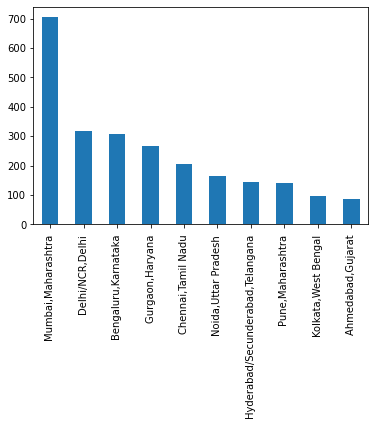

In [79]:
final_df['Hq'].value_counts()[0:10].plot.bar()

In [56]:
final_df.head()

,Company_name,Rating,Reviews,Company_type,Total_Locations,Employees,Total_no_of_years,Hq
0,TCS,3.9,50.5k,Public,"Mumbai,Maharashtra + 270 more",1 Lakh+ Employees (India),55,"Mumbai,Maharashtra"
1,Accenture,4.1,32.3k,Public,Dublin + 131 more,1 Lakh+ Employees (India),34,Dublin
2,Cognizant,4.0,29.7k,Private,Teaneck. New Jersey. + 101 more,1 Lakh+ Employees (India),29,Teaneck. New Jersey.
3,ICICI Bank,4.0,33.6k,Public,"Mumbai,Maharashtra + 1057 more",1 Lakh+ Employees (India),29,"Mumbai,Maharashtra"
4,HDFC Bank,4.0,39.3k,Public,"Mumbai,Maharashtra + 1248 more",50k-1 Lakh Employees (India),29,"Mumbai,Maharashtra"


### finding Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


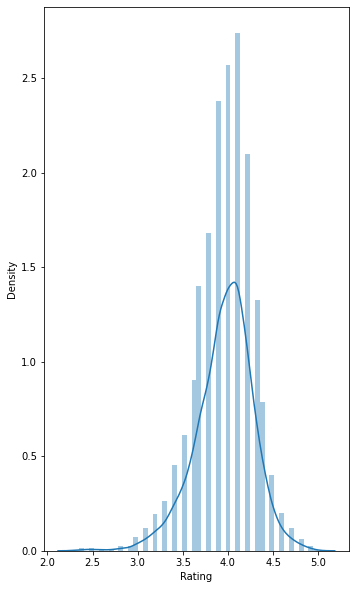

In [57]:
plt.figure(figsize=(12,10))
plt.subplot(121)
sns.distplot(final_df['Rating'])
plt.show()

# since the data is a little left skewed, but this can be ignored as the all the values lies within the range .

In [58]:
final_df['Rating'].describe()

count    4044.000000
mean        3.962216
std         0.321328
min         2.300000
25%         3.800000
50%         4.000000
75%         4.200000
max         5.000000
Name: Rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


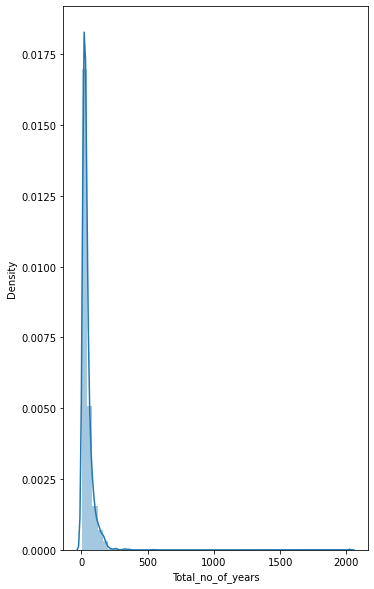

In [59]:
plt.figure(figsize=(12,10))
plt.subplot(121)
sns.distplot(final_df['Total_no_of_years'])
plt.show()


# its a heavily right skewed data so we have to apply boxplot to cap or terminate the outliers. 

In [60]:
final_df['Total_no_of_years'].describe()

count    4044.000000
mean       42.313798
std        57.840302
min         1.000000
25%        19.000000
50%        29.000000
75%        49.000000
max      2023.000000
Name: Total_no_of_years, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_no_of_years'>

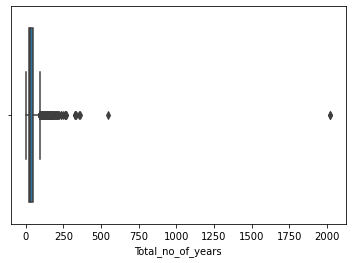

In [61]:
# to find outliers in the column, we are using boxplot 

sns.boxplot(final_df['Total_no_of_years'])

In [62]:
percentile75=final_df['Total_no_of_years'].quantile(0.75)
percentile25=final_df['Total_no_of_years'].quantile(0.25)

In [63]:
percentile75

49.0

In [64]:
percentile25

19.0

In [65]:
#iqr=Inter Quartile Range

iqr=percentile75 - percentile25
iqr

30.0

In [66]:
#formulae

upper_limit=percentile75 + 1.5*iqr
lower_limit=percentile25 - 1.5*iqr

In [67]:
upper_limit

94.0

In [68]:
lower_limit

-26.0

In [69]:
final_df[final_df['Total_no_of_years']>upper_limit].shape


(324, 8)

In [70]:
final_df[final_df['Total_no_of_years']<lower_limit].shape

(0, 8)

### CAPPING

In [71]:
final_df_cap=final_df.copy()           # copyng the data from the original data

final_df_cap['Total_no_of_years']=np.where(
                                  final_df_cap['Total_no_of_years']>upper_limit,
                                  upper_limit,
                                  np.where(
                                  final_df_cap['Total_no_of_years']<lower_limit,
                                  lower_limit,
                                  final_df_cap['Total_no_of_years']
                                  
                                  )


)

In [72]:
final_df_cap.shape

(4044, 8)

In [73]:
final_df_cap['Total_no_of_years'].describe()

count    4044.000000
mean       37.649110
std        25.226381
min         1.000000
25%        19.000000
50%        29.000000
75%        49.000000
max        94.000000
Name: Total_no_of_years, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

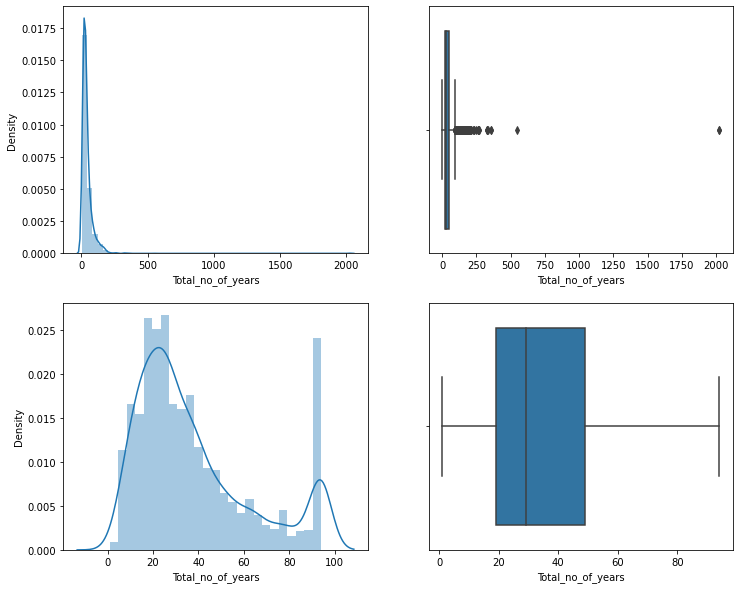

In [74]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(final_df['Total_no_of_years'])

plt.subplot(222)
sns.boxplot(final_df['Total_no_of_years'])

plt.subplot(223)
sns.distplot(final_df_cap['Total_no_of_years'])

plt.subplot(224)
sns.boxplot(final_df_cap['Total_no_of_years'])

plt.show()

In [75]:
final_df_cap.head()

,Company_name,Rating,Reviews,Company_type,Total_Locations,Employees,Total_no_of_years,Hq
0,TCS,3.9,50.5k,Public,"Mumbai,Maharashtra + 270 more",1 Lakh+ Employees (India),55.0,"Mumbai,Maharashtra"
1,Accenture,4.1,32.3k,Public,Dublin + 131 more,1 Lakh+ Employees (India),34.0,Dublin
2,Cognizant,4.0,29.7k,Private,Teaneck. New Jersey. + 101 more,1 Lakh+ Employees (India),29.0,Teaneck. New Jersey.
3,ICICI Bank,4.0,33.6k,Public,"Mumbai,Maharashtra + 1057 more",1 Lakh+ Employees (India),29.0,"Mumbai,Maharashtra"
4,HDFC Bank,4.0,39.3k,Public,"Mumbai,Maharashtra + 1248 more",50k-1 Lakh Employees (India),29.0,"Mumbai,Maharashtra"


In [77]:
ambition_web_scraping_project=pd.DataFrame(final_df_cap, columns=['Company_name', 'Rating', 'Reviews', 'Company_type', 'Total_Locations', 'Employees','Total_no_of_years','Hq'])
final_df_cap.to_csv('C://Users//RAJAT SINGH//Downloads//Ambition web scraping project//ambition_web_scraping_project.csv')